In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r"/content/accident_data .csv")

In [ ]:
df.head(5)

,Date,Time,Latitude,Longitude,Location Description,Weather Conditions,Road Conditions,Visibility,Accident Type,Injury Severity,Contributing Factors,Vehicle Type,No of Vehichles,Vehicle Speed,Day of Week,Month,Year
0,05-01-2022,15:30:00,40.7128,-74.0060,Highway,Foggy,Wet,Poor,Collision,Moderate,Speeding,Truck,1,45,Wednesday,January,2022
1,10-02-2022,18:45:00,41.8781,-87.6298,Street,Rainy,Wet,Poor,Rollover,Severe,Drunk Driving,Motorcycle,1,40,Thursday,February,2022
2,15-03-2022,12:00:00,37.7749,-122.4194,Intersection,Clear,Dry,Clear,Collision,Moderate,Weather,Car,2,25,Tuesday,March,2022
3,20-04-2022,09:20:00,34.0522,-118.2437,Highway,Clear,Dry,Clear,Collision,Minor,Other,Car,2,35,Wednesday,April,2022
4,25-05-2022,17:10:00,40.7128,-74.0060,Street,Rainy,Wet,Poor,Collision,Severe,Speeding,Car,1,50,Wednesday,May,2022


In [ ]:
df.shape

(147, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  147 non-null    object 
 1   Time                  147 non-null    object 
 2   Latitude              147 non-null    float64
 3   Longitude             147 non-null    float64
 4   Location Description  147 non-null    object 
 5   Weather Conditions    147 non-null    object 
 6   Road Conditions       147 non-null    object 
 7   Visibility            147 non-null    object 
 8   Accident Type         147 non-null    object 
 9   Injury Severity       147 non-null    object 
 10  Contributing Factors  147 non-null    object 
 11  Vehicle Type          147 non-null    object 
 12  No of Vehichles       147 non-null    int64  
 13  Vehicle Speed         147 non-null    int64  
 14  Day of Week           147 non-null    object 
 15  Month                 1

In [ ]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Location Description',
       'Weather Conditions', 'Road Conditions', 'Visibility', 'Accident Type',
       'Injury Severity', 'Contributing Factors', 'Vehicle Type',
       'No of Vehichles', 'Vehicle Speed', 'Day of Week', 'Month', 'Year'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,147.0,38.325525,3.197276,34.0522,34.0522,40.7128,40.7128,41.8781
Longitude,147.0,-98.649265,20.962406,-122.4194,-118.2437,-87.6298,-74.0060,-74.0060
No of Vehichles,147.0,1.428571,0.496564,1.0000,1.0000,1.0000,2.0000,2.0000
Vehicle Speed,147.0,38.843537,8.110285,25.0000,30.0000,35.0000,45.0000,55.0000
Year,147.0,2022.979592,0.823203,2022.0000,2022.0000,2023.0000,2024.0000,2024.0000


In [ ]:
df.describe(include=object)

,Date,Time,Location Description,Weather Conditions,Road Conditions,Visibility,Accident Type,Injury Severity,Contributing Factors,Vehicle Type,Day of Week,Month
count,147,147,147,147,147,147,147,147,147,147,147,147
unique,37,13,3,3,2,2,2,3,5,3,4,12
top,05-01-2022,15:30:00,Intersection,Clear,Dry,Clear,Collision,Minor,Speeding,Car,Thursday,January
freq,4,12,51,87,87,87,99,51,48,87,56,15


In [ ]:
df.isna().sum()

,0
Date,0
Time,0
Latitude,0
Longitude,0
Location Description,0
Weather Conditions,0
Road Conditions,0
Visibility,0
Accident Type,0
Injury Severity,0


In [ ]:
print(df.columns)  # Print the actual column names

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Location Description',
       'Weather Conditions', 'Road Conditions', 'Visibility', 'Accident Type',
       'Injury Severity', 'Contributing Factors', 'Vehicle Type',
       'No of Vehichles', 'Vehicle Speed', 'Day of Week', 'Month', 'Year'],
      dtype='object')


In [ ]:
#storing categorical column names to a new variable
categorical=[i for i in df.columns if df[i].dtype=='O']
#for categorical values we can replace the null values with the Mode of it
for i in categorical:
    df[i].fillna(df[i].mode()[0],inplace=True)

<ipython-input-14-ad7d3e46674d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)


In [ ]:
df.isna().sum()

,0
Date,0
Time,0
Latitude,0
Longitude,0
Location Description,0
Weather Conditions,0
Road Conditions,0
Visibility,0
Accident Type,0
Injury Severity,0


In [ ]:
print(df.columns)  # This will print all the column names in your DataFrame

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Location Description',
       'Weather Conditions', 'Road Conditions', 'Visibility', 'Accident Type',
       'Injury Severity', 'Contributing Factors', 'Vehicle Type',
       'No of Vehichles', 'Vehicle Speed', 'Day of Week', 'Month', 'Year'],
      dtype='object')


In [ ]:
df.duplicated().sum()

110

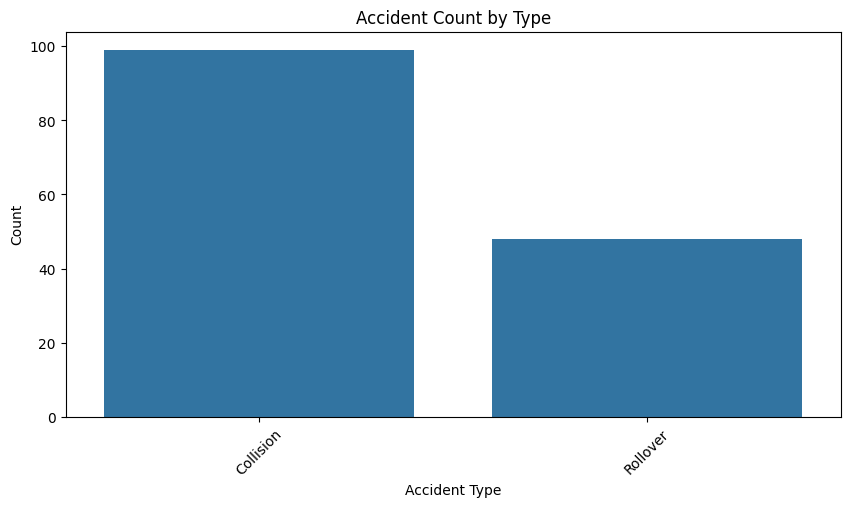

In [ ]:
# Example: Count plot of accidents per category (modify column name as needed)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Accident Type')  # Changed 'Accident_Type' to 'Accident Type'
plt.xticks(rotation=45)
plt.xlabel("Accident Type")
plt.ylabel("Count")
plt.title("Accident Count by Type")
plt.show()

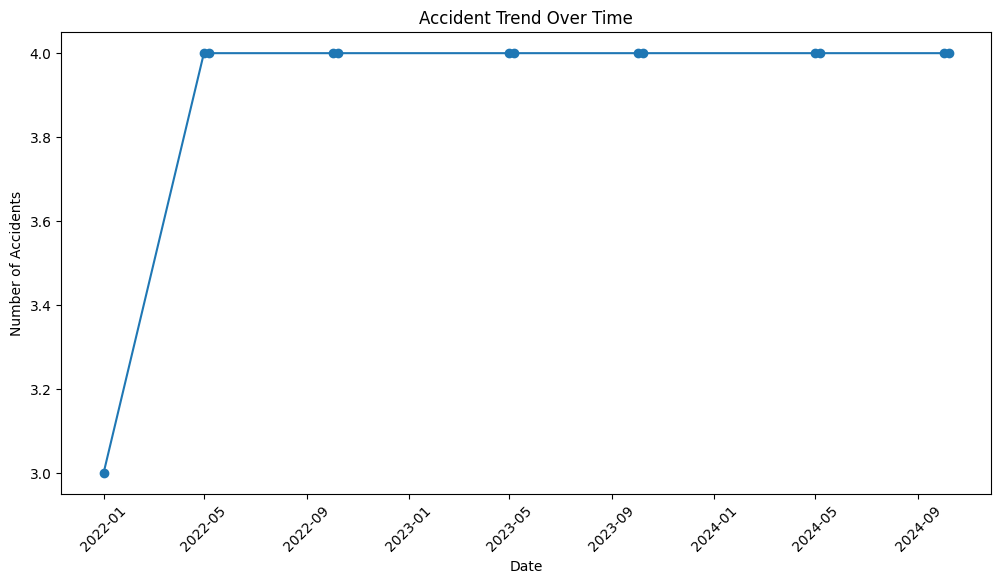

In [ ]:


# Convert 'Date' column to datetime format (change column name if needed)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['Date'])

# Group by date and count accidents
accident_trend = df.groupby(df['Date'].dt.date).size()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(accident_trend.index, accident_trend.values, marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Number of Accidents")
plt.title("Accident Trend Over Time")
plt.xticks(rotation=45)
plt.show()
